In [1]:
# load cifar10 data

from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation, Flatten, Dropout
import keras

In [3]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(GlobalAveragePooling2D())

    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [4]:
# just use a part of training data

# NO PREPROCESSING

import keras

x_train1 = x_train[0:30000]
y_train1 = keras.utils.to_categorical(y_train[0:30000], 10) 
x_valid1 = x_test[0:100]
y_valid1 = keras.utils.to_categorical(y_test[0:100], 10) 


model1 = get_model()
history1 = model1.fit(x_train1, y_train1, batch_size=64, epochs=30, shuffle=False, validation_data=(x_valid1, y_valid1))

Train on 30000 samples, validate on 100 samples
Epoch 1/30
30000/30000 [==============================] - 62s 2ms/step - loss: 14.5007 - acc: 0.0994 - val_loss: 14.3451 - val_acc: 0.1100
Epoch 2/30
30000/30000 [==============================] - 58s 2ms/step - loss: 14.5090 - acc: 0.0998 - val_loss: 14.3451 - val_acc: 0.1100
Epoch 3/30
30000/30000 [==============================] - 58s 2ms/step - loss: 14.5090 - acc: 0.0998 - val_loss: 14.3451 - val_acc: 0.1100
Epoch 4/30
30000/30000 [==============================] - 58s 2ms/step - loss: 14.5090 - acc: 0.0998 - val_loss: 14.3451 - val_acc: 0.1100
Epoch 5/30
30000/30000 [==============================] - 59s 2ms/step - loss: 14.5090 - acc: 0.0998 - val_loss: 14.3451 - val_acc: 0.1100
Epoch 6/30
30000/30000 [==============================] - 59s 2ms/step - loss: 14.5090 - acc: 0.0998 - val_loss: 14.3451 - val_acc: 0.1100
Epoch 7/30
30000/30000 [==============================] - 58s 2ms/step - loss: 14.5090 - acc: 0.0998 - val_loss: 14.34

In [5]:
# PREPROCESSING: zero-center

import keras

x_train2 = x_train[0:30000] - 127.0
y_train2 = keras.utils.to_categorical(y_train[0:30000], 10) 
x_valid2 = x_test[0:100] - 127.0
y_valid2 = keras.utils.to_categorical(y_test[0:100], 10) 

model2 = get_model()
history2 = model2.fit(x_train2, y_train2, batch_size=64, epochs=30, shuffle=False, validation_data=(x_valid2, y_valid2))

Train on 30000 samples, validate on 100 samples
Epoch 1/30
30000/30000 [==============================] - 59s 2ms/step - loss: 1.8652 - acc: 0.3053 - val_loss: 1.4594 - val_acc: 0.4900
Epoch 2/30
30000/30000 [==============================] - 59s 2ms/step - loss: 1.3588 - acc: 0.5057 - val_loss: 1.0924 - val_acc: 0.6300
Epoch 3/30
30000/30000 [==============================] - 59s 2ms/step - loss: 1.1336 - acc: 0.5954 - val_loss: 0.8933 - val_acc: 0.7000
Epoch 4/30
30000/30000 [==============================] - 59s 2ms/step - loss: 0.9983 - acc: 0.6474 - val_loss: 0.8471 - val_acc: 0.7000
Epoch 5/30
30000/30000 [==============================] - 59s 2ms/step - loss: 0.8960 - acc: 0.6854 - val_loss: 0.8785 - val_acc: 0.6900
Epoch 6/30
30000/30000 [==============================] - 59s 2ms/step - loss: 0.8314 - acc: 0.7081 - val_loss: 0.8667 - val_acc: 0.7700
Epoch 7/30
30000/30000 [==============================] - 59s 2ms/step - loss: 0.7563 - acc: 0.7324 - val_loss: 0.8116 - val_acc: 

In [6]:
# PREPROCESSING: scaling

import keras

x_train3 = x_train[0:30000] / 255.0
y_train3 = keras.utils.to_categorical(y_train[0:30000], 10) 
x_valid3 = x_test[0:100] / 255.0
y_valid3 = keras.utils.to_categorical(y_test[0:100], 10)

model3 = get_model()
history3 = model3.fit(x_train3, y_train3, batch_size=64, epochs=30, shuffle=False, validation_data=(x_valid3, y_valid3))

Train on 30000 samples, validate on 100 samples
Epoch 1/30
30000/30000 [==============================] - 60s 2ms/step - loss: 1.8312 - acc: 0.2996 - val_loss: 1.5467 - val_acc: 0.4100
Epoch 2/30
30000/30000 [==============================] - 59s 2ms/step - loss: 1.4073 - acc: 0.4792 - val_loss: 1.2206 - val_acc: 0.5300
Epoch 3/30
30000/30000 [==============================] - 60s 2ms/step - loss: 1.2087 - acc: 0.5608 - val_loss: 1.0892 - val_acc: 0.6000
Epoch 4/30
30000/30000 [==============================] - 59s 2ms/step - loss: 1.0700 - acc: 0.6177 - val_loss: 0.9811 - val_acc: 0.6200
Epoch 5/30
30000/30000 [==============================] - 59s 2ms/step - loss: 0.9623 - acc: 0.6549 - val_loss: 0.8785 - val_acc: 0.6600
Epoch 6/30
30000/30000 [==============================] - 59s 2ms/step - loss: 0.8802 - acc: 0.6885 - val_loss: 0.7940 - val_acc: 0.6800
Epoch 7/30
30000/30000 [==============================] - 59s 2ms/step - loss: 0.8053 - acc: 0.7146 - val_loss: 0.7155 - val_acc: 

In [7]:
# PREPROCESSING: zero-center + scaling

import keras

x_train4 = (x_train[0:30000] - 127.0) / 127.0
y_train4 = keras.utils.to_categorical(y_train[0:30000], 10)

x_valid4 = (x_test[0:100] - 127.0) / 127.0
y_valid4 = keras.utils.to_categorical(y_test[0:100], 10) 

model4 = get_model()
history4 = model4.fit(x_train4, y_train4, batch_size=64, epochs=30, shuffle=False, validation_data=(x_valid4, y_valid4))

Train on 30000 samples, validate on 100 samples
Epoch 1/30
30000/30000 [==============================] - 59s 2ms/step - loss: 1.7410 - acc: 0.3383 - val_loss: 1.3541 - val_acc: 0.4900
Epoch 2/30
30000/30000 [==============================] - 59s 2ms/step - loss: 1.3070 - acc: 0.5234 - val_loss: 1.0880 - val_acc: 0.5700
Epoch 3/30
30000/30000 [==============================] - 59s 2ms/step - loss: 1.0970 - acc: 0.6073 - val_loss: 0.9784 - val_acc: 0.6300
Epoch 4/30
30000/30000 [==============================] - 59s 2ms/step - loss: 0.9692 - acc: 0.6551 - val_loss: 0.8978 - val_acc: 0.6600
Epoch 5/30
30000/30000 [==============================] - 59s 2ms/step - loss: 0.8769 - acc: 0.6879 - val_loss: 0.8699 - val_acc: 0.6900
Epoch 6/30
30000/30000 [==============================] - 59s 2ms/step - loss: 0.7974 - acc: 0.7197 - val_loss: 0.7887 - val_acc: 0.7000
Epoch 7/30
30000/30000 [==============================] - 59s 2ms/step - loss: 0.7252 - acc: 0.7449 - val_loss: 0.7113 - val_acc: 

Text(0.5, 1.0, 'Training loss')

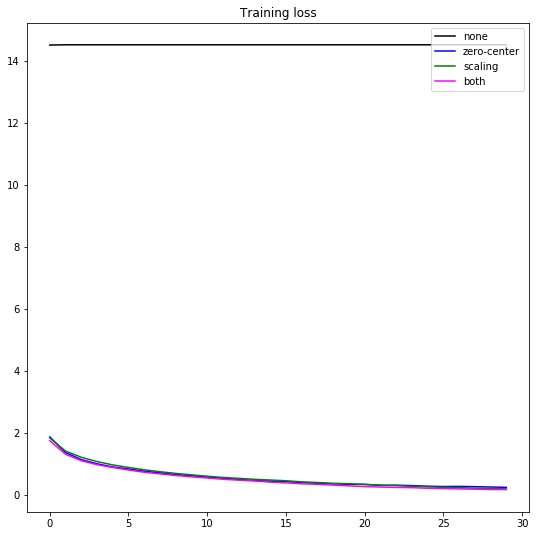

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

x = [i for i in range(30)]

# loss curves for 4 models
plt.figure(figsize=(9, 9))

l = plt.plot(x, history1.history['loss'])
plt.setp(l, color='black', ls='-', label='none')

l = plt.plot(x, history2.history['loss'])
plt.setp(l, color='blue', ls='-', label='zero-center')

l = plt.plot(x, history3.history['loss'])
plt.setp(l, color='green', ls='-', label='scaling')

l = plt.plot(x, history4.history['loss'])
plt.setp(l, color='magenta', ls='-', label='both')


plt.legend(loc='upper right')
plt.title('Training loss')

Text(0.5, 1.0, 'Training accuracy')

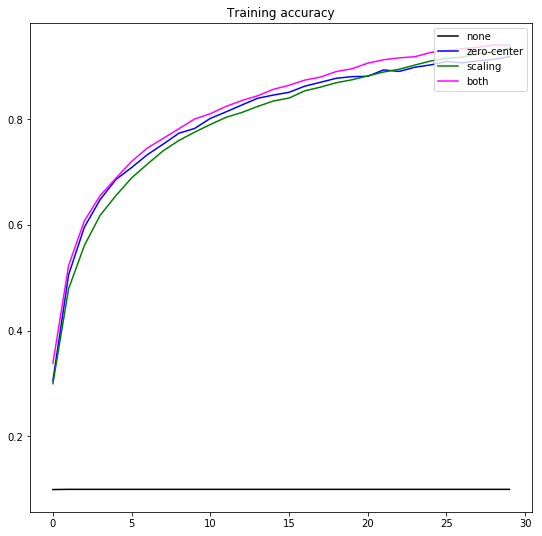

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt

x = [i for i in range(30)]

# loss curves for 4 models
plt.figure(figsize=(9, 9))

l = plt.plot(x, history1.history['acc'])
plt.setp(l, color='black', ls='-', label='none')

l = plt.plot(x, history2.history['acc'])
plt.setp(l, color='blue', ls='-', label='zero-center')

l = plt.plot(x, history3.history['acc'])
plt.setp(l, color='green', ls='-', label='scaling')

l = plt.plot(x, history4.history['acc'])
plt.setp(l, color='magenta', ls='-', label='both')


plt.legend(loc='upper right')
plt.title('Training accuracy')

Text(0.5, 1.0, 'Valid accuracy')

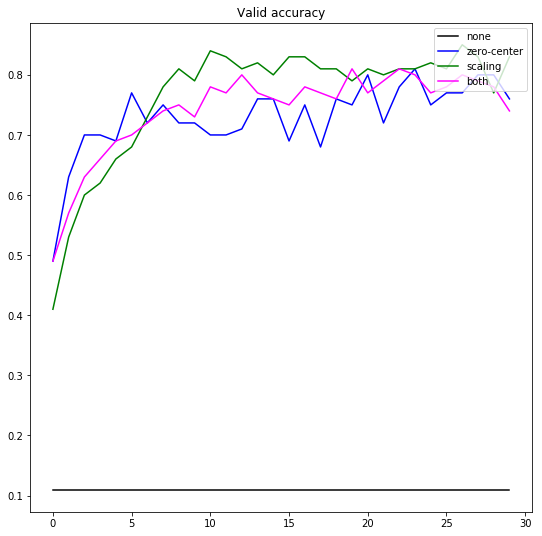

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

x = [i for i in range(30)]

# loss curves for 4 models
plt.figure(figsize=(9, 9))

l = plt.plot(x, history1.history['val_acc'])
plt.setp(l, color='black', ls='-', label='none')

l = plt.plot(x, history2.history['val_acc'])
plt.setp(l, color='blue', ls='-', label='zero-center')

l = plt.plot(x, history3.history['val_acc'])
plt.setp(l, color='green', ls='-', label='scaling')

l = plt.plot(x, history4.history['val_acc'])
plt.setp(l, color='magenta', ls='-', label='both')


plt.legend(loc='upper right')
plt.title('Valid accuracy')